#  Video Game Sales Analysis
## Business Problems
 - A game company wants to expand into new markets and improve revenue from existing titles. This analysis identifies top-performing genres, platforms, and regional trends to guide product and marketing strategy.

In [3]:
## Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv("vgsales.csv")
df0 = df.copy()

### Data Exploration

In [6]:
print(df0.info())
print()
print(df0.isna().sum())
print()
print('Number of Duplicates:', df0.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Number of Duplicates: 0


- This dataset contains `16598 Rows` and `11 columns`.
- It contains total of 329 null values. `271 in Year` and `58 in Publisher`
- We have to convert Year columns from float to int

In [8]:
## Droping null values
df0.dropna(inplace=True)
print(df0.isna().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


Droped the null values by rows

In [10]:
df0.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [11]:
##Desribing the Categorical variables
df0.describe(exclude='number')

Name Platform   Genre        Publisher
count                         16291    16291   16291            16291
unique                        11325       31      12              576
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             12     2131    3251             1339

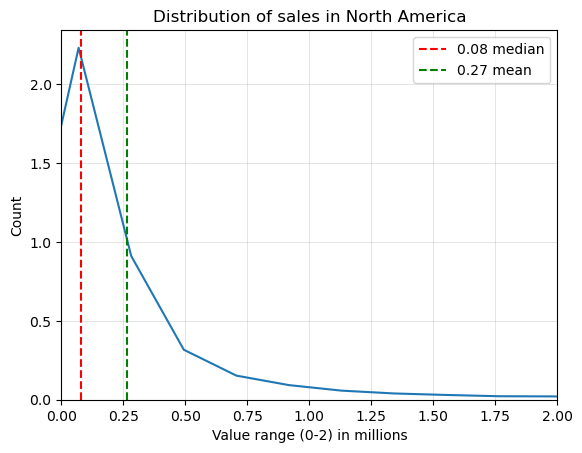

In [12]:
## Distribution of Game sales in North America
sns.kdeplot(df0['NA_Sales'])
plt.title('Distribution of sales in North America')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['NA_Sales'].median(),2)), str(round(df0['NA_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

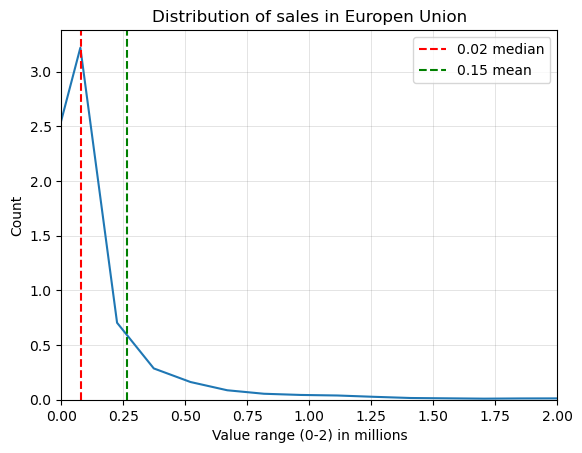

In [13]:
## Distribution of Game sales in Europen Union Sales
sns.kdeplot(df0['EU_Sales'],)
plt.title('Distribution of sales in Europen Union')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['EU_Sales'].median(),2)), str(round(df0['EU_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

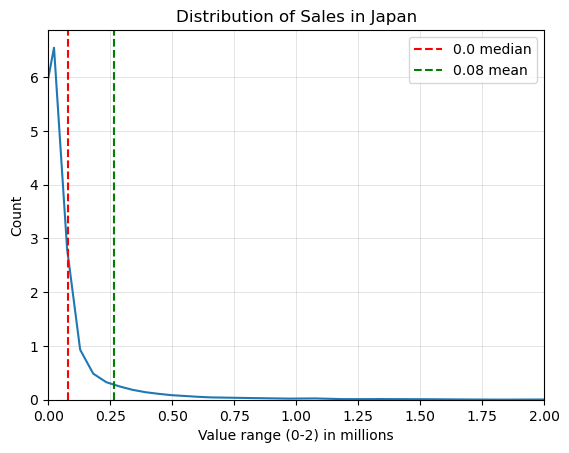

In [14]:
## Distribution of Game sales in Japan
sns.kdeplot(df0['JP_Sales'])
plt.title('Distribution of Sales in Japan')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['JP_Sales'].median(),2)), str(round(df0['JP_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

In [15]:
## Game Sales Aggrigation
df0[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']].agg(['sum','mean','median','std'])

Global_Sales     NA_Sales     EU_Sales     JP_Sales
sum      8811.970000  4327.650000  2406.690000  1284.270000
mean        0.540910     0.265647     0.147731     0.078833
median      0.170000     0.080000     0.020000     0.000000
std         1.567345     0.822432     0.509303     0.311879

Most of the sales in different region are from 0 to 0.50 with global sales averge of 0.08 millions over all years

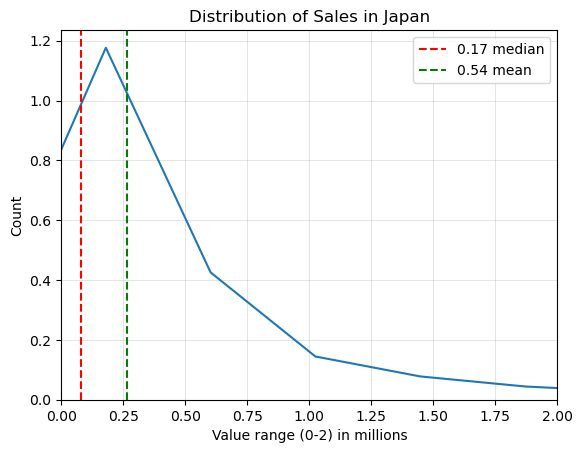

In [17]:
## Distribution of Game Global sales
sns.kdeplot(df0['Global_Sales'])
plt.title('Distribution of Sales in Japan')
plt.xlabel('Value range (0-2) in millions')
plt.ylabel('Count')
median,mean = str(round(df0['Global_Sales'].median(),2)), str(round(df0['Global_Sales'].mean(),2))
plt.axvline(df0['NA_Sales'].median(),ls='--',c='r',label=median+ ' median')
plt.axvline(df0['NA_Sales'].mean(),ls='--',c='g',label=mean+ ' mean')
plt.xlim(0,2)
plt.grid(color='gray',lw=0.5,alpha=0.3)
plt.legend();

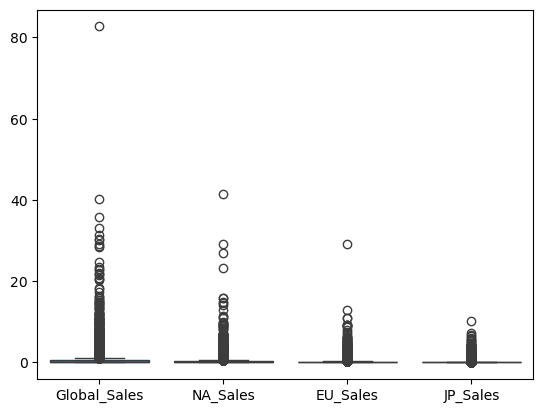

In [18]:
## Checking for outliers
sns.boxplot(data=df0[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']]);

 - Some games in the dataset are natural outliers due to massive global popularity. Instead of removing them, I retained these values to preserve important market insights.
 - Outliers were retained to reflect real world variance in game sales. No ML model is applied, so robustness to outliers wasn’t critical.

In [20]:
## Checking for miss leading name duplication
print('distinct Platform: ', df0['Platform'].sort_values().unique())
print()
print('Year unique values: ',df0['Year'].sort_values().unique())
print()
print('Gener unique values: ',df0['Genre'].sort_values().unique())
print()
print('Publisher unique values: ',df0['Publisher'].sort_values().nunique())

distinct Platform:  ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']

Year unique values:  [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.]

Gener unique values:  ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']

Publisher unique values:  576


In [21]:
# Remove missing years (if any)
df_year = df0.dropna(subset=['Year'])

# Group by Year and sum Global_Sales
yearly_sales = df_year.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().reset_index()

# Sort by year (ascending)
yearly_sales = yearly_sales.sort_values(by='Year')

In [22]:
## Checking for misspelled name
df0[df0['Publisher'].str.lower().str.startswith('sony')]['Publisher'].unique()

array(['Sony Computer Entertainment',
       'Sony Computer Entertainment Europe', 'Sony Online Entertainment',
       'Sony Computer Entertainment America', 'Sony Music Entertainment'],
      dtype=object)

In [23]:
## Renaming the strings
df0.loc[df0['Publisher'].str.lower().str.startswith('sony'),'Publisher'] = 'Sony Computer Entertainment'

In [24]:
## Cross checking the name
df0[df0['Publisher'].str.lower().str.startswith('sony')]['Publisher'].unique()

array(['Sony Computer Entertainment'], dtype=object)

`Renamed` the 'Sony Computer Entertainment','Sony Computer Entertainment Europe', 'Sony Online Entertainment','Sony Computer Entertainment America', 'Sony Music Entertainment' to `Sony Computer Entertainment`

## Exploratory Data Analysis

## Global Sales Trend by Region
This line chart shows how global, `North America`, `European Union`, and `Japan` sales evolved over the years.


In [28]:
## Combaining the columns
melted = yearly_sales.melt(id_vars='Year', 
                           value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'],
                           var_name='Region',
                           value_name='Sales')
# Plotly line chart
fig = px.line(melted, 
              x='Year', 
              y='Sales', 
              color='Region',
              markers=True,
              title='Video Game Sales Trend by Region Over the Years')

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Sales (Millions)',
    xaxis=dict(
        tickmode='linear',
        tick0=yearly_sales['Year'].min(),
        dtick=1,
        tickangle=-45# Show every year
    ),
    template='plotly_white',
    title_x=0.5,
    width=1600,
    height=500
)
fig.show()


## Global Sales Trend by Genre
This line chart shows how Genre `Action`, `Sports`, `Shooter`, `Misc`, `Racing`, `Role-Playing` sales evolved over the years.

In [30]:
# Plotly line chart for Video Game Sales Trend by Genre Over the Years
df_Genre = df0.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()

df_Genre_top = df_Genre[df_Genre['Genre'].isin(['Action', 'Sports', 'Shooter', 'Misc', 'Racing', 'Role-Playing'])]

## Plotly
fig = px.line(
    df_Genre_top,
    x='Year',
    y='Global_Sales',
    color='Genre',
    markers=True,
    title="Video Game Sales Trend by Genre Over the Years",
    labels={'Global_Sales': 'Sales (Millions)', 'Year': 'Year'}
)

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=df_Genre_top['Year'].min(),
        dtick=1,
        tickangle=-45
    ),
    yaxis_title="Sales (Millions)",
    width=1600,
    height=500,
    template='plotly_white',
    title_x=0.5
)

fig.show()


## Global Sales Trend by Platform
This line chart shows how Platform `PC`, `DS`, `GB`, `PS2`, `X360`,`Wii`,`ps`,`ps3` sales evolved over the years.

In [32]:
df0['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [33]:
df_top_plt = df0.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()

df_top = df_top_plt[df_top_plt['Platform'].isin(['PC', 'DS', 'GB', 'PS2', 'X360','Wii','ps','ps3','PS4'])]

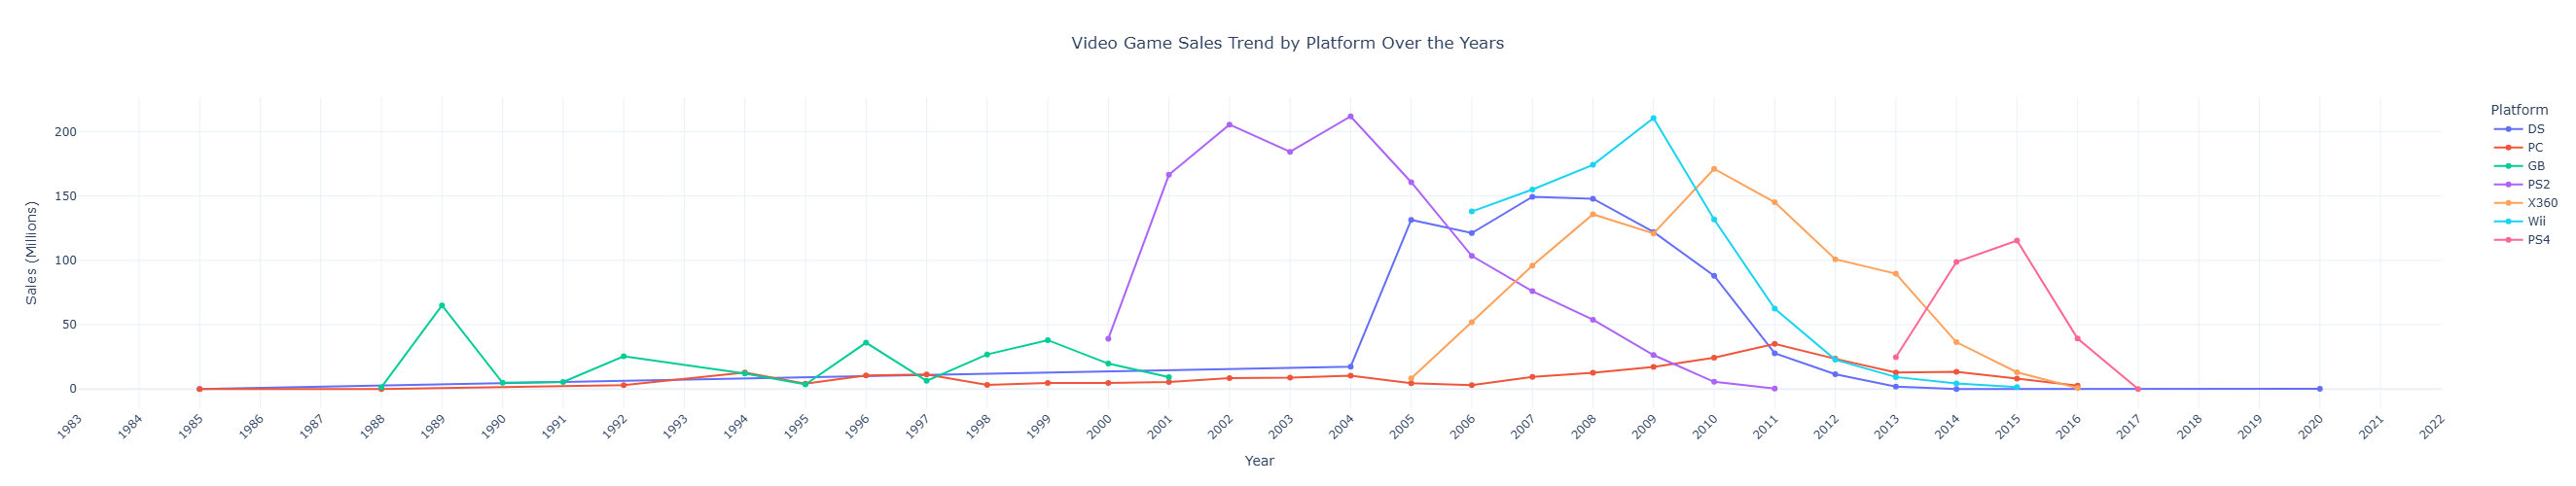

In [34]:
# Plotly line chart for Video Game Sales Trend by Platform Over the Years
fig = px.line(
    df_top,
    x='Year',
    y='Global_Sales',
    color='Platform',
    markers=True,
    title="Video Game Sales Trend by Platform Over the Years",
    labels={'Global_Sales': 'Sales (Millions)', 'Year': 'Year'},
)

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=df_top['Year'].min(),
        dtick=1,
        tickangle=-45
    ),
    yaxis_title="Sales (Millions)",
    template='plotly_white',
    title_x=0.5,
    legend_title="Platform",
    width=1600,
    height=500
)

fig.show()


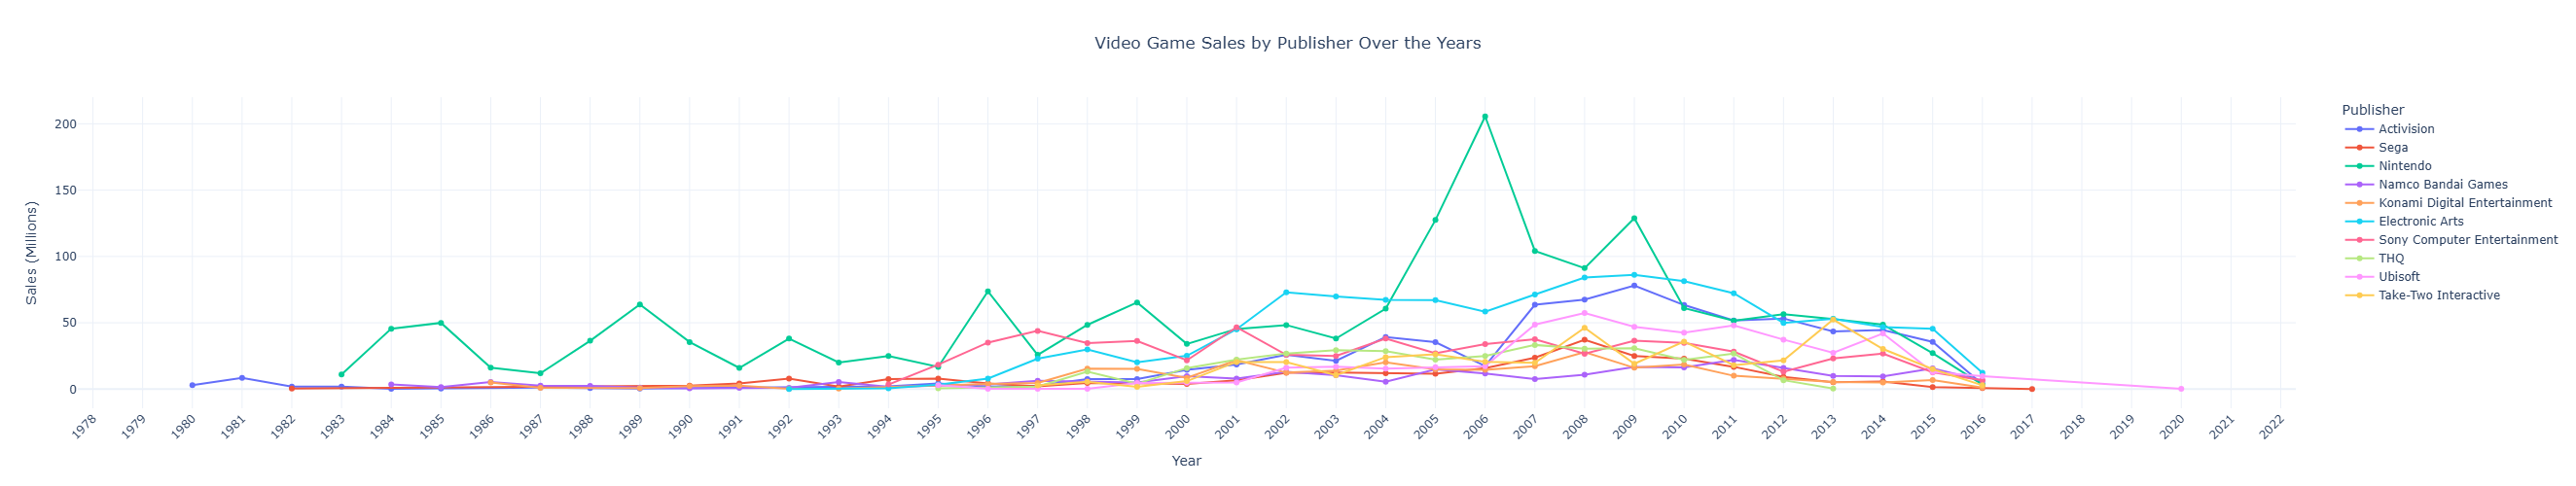

In [36]:
## picking top 10 Publisher by aggregating largest global sales.
top_dist = df0.groupby(['Year','Publisher'])['Global_Sales'].sum().reset_index()
top_10_dist = top_dist[top_dist['Publisher'].isin(['Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ', 'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games','Nintendo'])]

fig = px.line(
    top_10_dist,
    x='Year',
    y='Global_Sales',
    color='Publisher',
    markers=True,
    title="Video Game Sales by Publisher Over the Years",
    labels={'Global_Sales': 'Sales (Millions)', 'Year': 'Year'},
)

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=top_10_dist['Year'].min(),
        dtick=1,
        tickangle=-45
    ),
    yaxis_title="Sales (Millions)",
    template='plotly_white',
    title_x=0.5,
    legend_title="Publisher",
    width=1600,
    height=500
)

fig.show()

In [38]:
## Aanalysing the top 10 Publisher over time periode. 
top_10_dist = df0[df0['Publisher'].isin(['Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ', 'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games','Nintendo'])]
top_10_dist = top_10_dist[['Year','Global_Sales','Publisher']]

In [40]:
fig = px.line(
    top_10_dist,
    x='Year',
    y='Global_Sales',
    color='Publisher',
    markers=True,
    title="Video Game Sales by Publisher Over the Years",
    labels={'Global_Sales': 'Sales (Millions)', 'Year': 'Year'},
)

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=top_10_dist['Year'].min(),
        dtick=1,
        tickangle=-45
    ),
    yaxis_title="Sales (Millions)",
    template='plotly_white',
    title_x=0.5,
    legend_title="Publisher",
    width=1600,
    height=500
)

fig.show()

`Nintendo` has demonstrated consistent game sales from `1983 to 2016`, with a significant peak during `2004 to 2009`.
Electronic Arts (EA) follows closely behind, maintaining strong performance between `2001 and 2015`, indicating sustained market presence through multiple console generations.

## Platform Sales
This Bar chart shows different `Platform` sales. Ordered by highest to lowest sales

In [44]:
# Aggregate and sort the data
platform_sales = df0.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot
fig = px.bar(
    platform_sales,
    x='Platform',
    y='Global_Sales',
    title="Global Sales by Platform",
    labels={'Global_Sales': 'Total Global Sales (Millions)', 'Platform': 'Platform'},
    text='Global_Sales'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Total Global Sales (Millions)',
    xaxis_title='Platform',
    template='plotly_white',
    width=1600,
    height=500,
    title_x=0.5
)

fig.show()


In [45]:
# Grouping data by Genre and summing up sales in each region
genre_sales = df0.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melting the DataFrame to long format for seaborn
genre_sales_melted = genre_sales.melt(id_vars='Genre', 
                                       value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                                       var_name='Region', 
                                       value_name='Sales')

# Plotting
fig = px.bar(
    genre_sales_melted,
    x='Genre',
    y='Sales',
    color='Region',
    barmode='group',
    title='Sales by Genre and Region',
    labels={'Sales': 'Sales (Millions)', 'Genre': 'Genre'},
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

fig.update_layout(
    xaxis_tickangle=-45,
    template='plotly_white',
    width=1600,
    height=500,
    title_x=0.5,
    legend_title='Region'
)

fig.show()

## Global Sales Trend by Genre Role playe and Shooter
This Bar chart shows how Genre `Role playe` and `Shooter` sales evolved over Region.

In [47]:
# Plotly Bar chart for Video Game Sales in Role play and Shooter over region
genre_region_sales = df0[df0['Genre'].isin(['Shooter', 'Role-Playing'])] \
    .groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().reset_index()

genre_melted = genre_region_sales.melt(id_vars='Genre', 
                                       value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'],
                                       var_name='Region',
                                       value_name='Sales')

fig = px.bar(
    genre_melted,
    x='Genre',
    y='Sales',
    color='Region',
    barmode='group',
    title='Shooter vs Role-Playing Genre Sales by Region',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(title_x=0.5,height=500,width=1000)
fig.show()


## Top Distributer in Japan

In [49]:
# Group by Publisher and sum JP_Sales
jp_top_publishers = df0.groupby('Publisher')['JP_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot (Optional)
fig = px.bar(
    jp_top_publishers.head(10),
    x='JP_Sales',
    y='Publisher',
    orientation='h',  # Horizontal bars
    title='Top 10 Publishers by Sales in Japan',
    labels={'JP_Sales': 'JP Sales (Millions)', 'Publisher': 'Publisher'},
    color='Publisher',\
    color_discrete_sequence=px.colors.sequential.amp_r
)

fig.update_layout(
    template='plotly_white',
    height=500,
    width=800,
    yaxis={'categoryorder':'total ascending'},  # Order bars by JP_Sales
    showlegend=False,
    title_x=0.5
)

fig.show()

## Top Distributer in North America

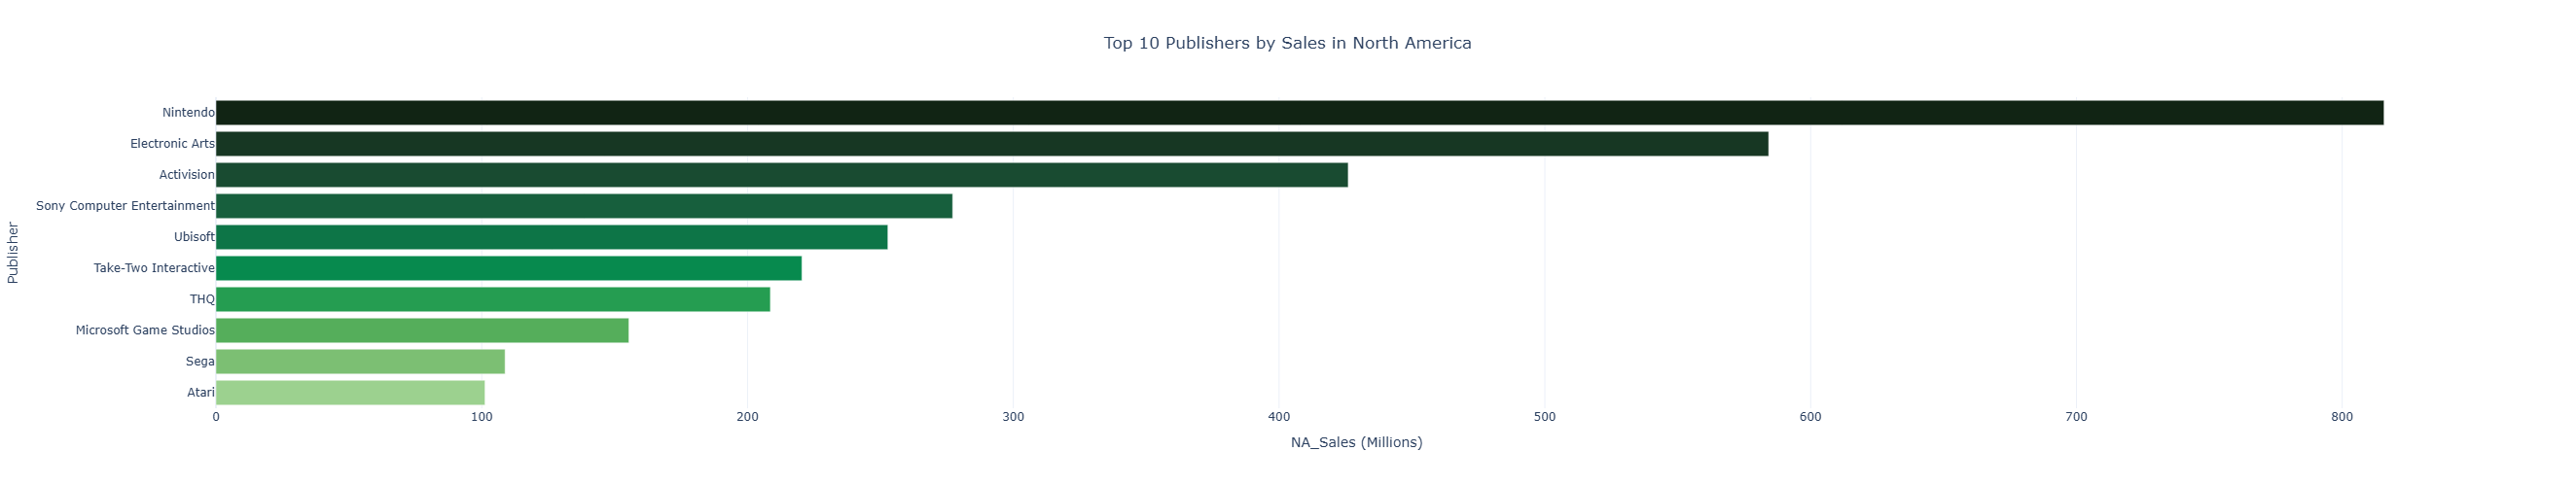

In [51]:
# Group by Publisher and sum North America
NA_top_publishers = df0.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot (Optional)
fig = px.bar(
    NA_top_publishers.head(10),
    x='NA_Sales',
    y='Publisher',
    orientation='h',  # Horizontal bars
    title='Top 10 Publishers by Sales in North America',
    labels={'NA_Sales': 'NA_Sales (Millions)', 'Publisher': 'Publisher'},
    color='Publisher',\
    color_discrete_sequence=px.colors.sequential.algae_r
)

fig.update_layout(
    template='plotly_white',
    height=500,
    width=800,
    yaxis={'categoryorder':'total ascending'},  # Order bars by JP_Sales
    showlegend=False,
    title_x=0.5
)

fig.show()

## Top Distributer in European Union

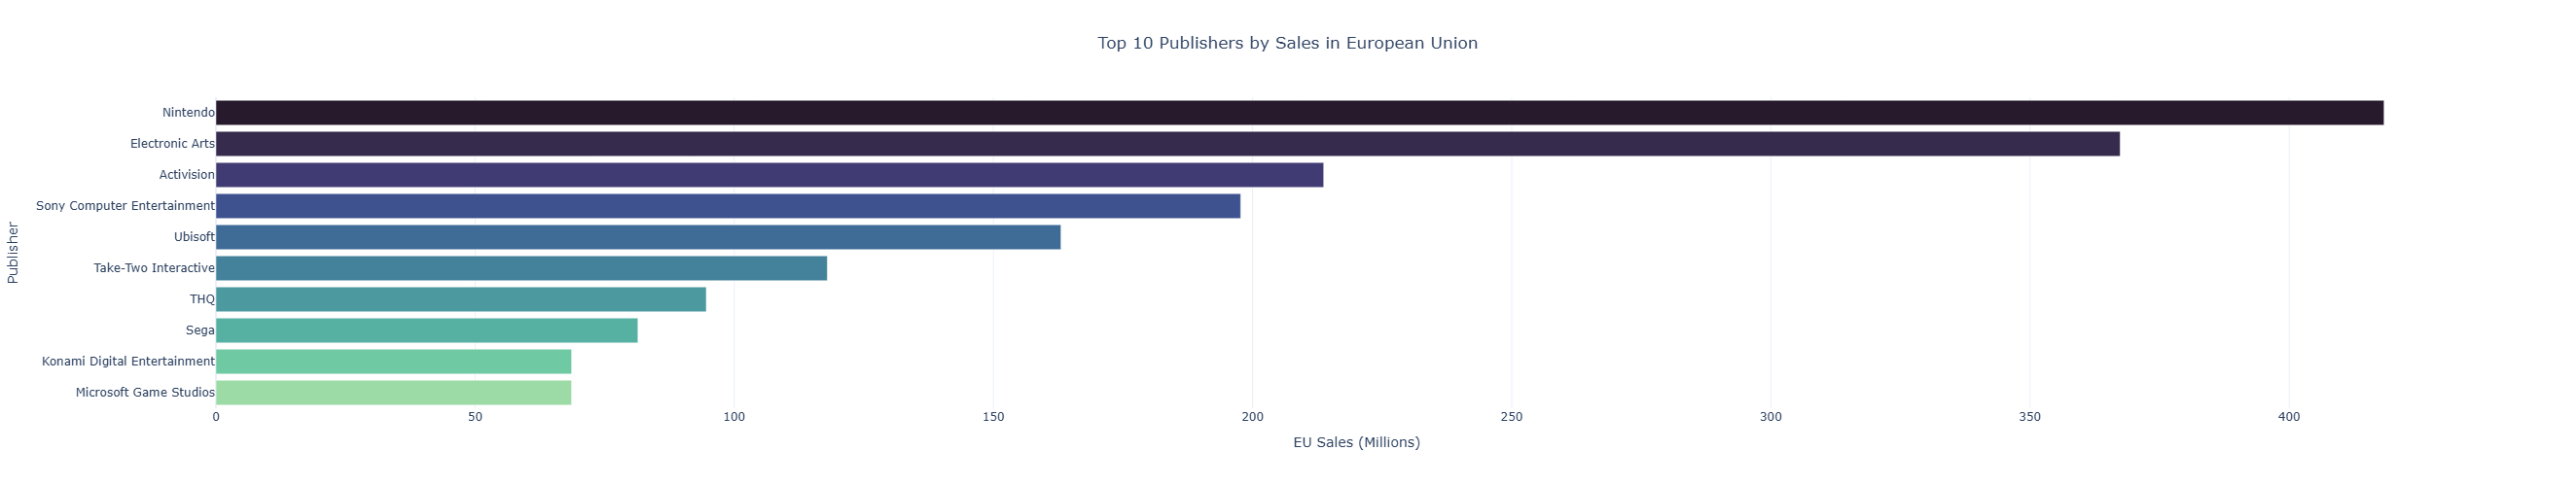

In [53]:
# Group by Publisher and sum North America
EU_top_publishers = df0.groupby('Publisher')['EU_Sales'].sum().sort_values(ascending=False).reset_index()

# Plot (Optional)
fig = px.bar(
    EU_top_publishers.head(10),
    x='EU_Sales',
    y='Publisher',
    orientation='h',  # Horizontal bars
    title='Top 10 Publishers by Sales in European Union',
    labels={'EU_Sales': 'EU Sales (Millions)', 'Publisher': 'Publisher'},
    color='Publisher',\
    color_discrete_sequence=px.colors.sequential.deep_r
)

fig.update_layout(
    template='plotly_white',
    height=500,
    width=800,
    yaxis={'categoryorder':'total ascending'},  # Order bars by JP_Sales
    showlegend=False,
    title_x=0.5
)

fig.show()

It shows Nintendo is the top publisher in this 3 different place.

In [55]:
nin_df = df0[df0['Publisher']=="Nintendo"]

In [56]:
nin_df.describe()

Rank        Year    NA_Sales    EU_Sales    JP_Sales  \
count    696.000000   696.00000  696.000000  696.000000  696.000000   
mean    3801.864943  2003.83046    1.172055    0.601006    0.653721   
std     3969.268372     7.77637    2.989913    1.743953    1.063110   
min        1.000000  1983.00000    0.000000    0.000000    0.000000   
25%      710.750000  2000.00000    0.010000    0.007500    0.090000   
50%     2262.000000  2005.00000    0.375000    0.120000    0.280000   
75%     5901.750000  2009.00000    0.972500    0.482500    0.740000   
max    16545.000000  2016.00000   41.490000   29.020000   10.220000   

       Other_Sales  Global_Sales  
count   696.000000    696.000000  
mean      0.136767      2.563836  
std       0.464170      5.676925  
min       0.000000      0.010000  
25%       0.000000      0.300000  
50%       0.030000      0.920000  
75%       0.090000      2.262500  
max       8.460000     82.740000

In [57]:
nin_df.head(2)

Rank               Name Platform    Year     Genre Publisher  NA_Sales  \
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24

In [67]:
nin_df.groupby('Genre')["Global_Sales"].sum().sort_values(ascending=False)

Genre
Platform        426.18
Role-Playing    284.57
Sports          218.01
Misc            180.67
Racing          151.30
Action          128.10
Puzzle          124.88
Simulation       85.25
Shooter          69.69
Fighting         53.35
Adventure        35.71
Strategy         26.72
Name: Global_Sales, dtype: float64

## Summery

1. **Platform Performance**
    - PlayStation 2 (PS2) consistently dominated global sales, especially between 2001 and 2005, making it the most commercially successful platform in the dataset.
    - Wii and Xbox 360 also showed strong sales peaks around 2008–2010, indicating high consumer interest in motion control and online features during that period.

2. **Genre**
    - Action, Sports, and Shooter genres were the top performers globally, particularly in North America and Europe.
    - Role-Playing Games (RPGs) performed significantly better in Japan, indicating strong regional genre preferences.

4. **Regional Revenue**
   - Contributions North America (NA) and Europe (EU) contributed the most to global sales, while Japan (JP), although smaller, had distinct taste and market behavior.
   - Games that performed well across NA and EU simultaneously generally achieved higher global success.

5. **Top Publishers**
   - A few dominant publishers like Nintendo, Electronic Arts, and Activision had significantly higher cumulative sales.
   - Publishers that diversified across platforms and genres saw broader global success.

## Recommendations 
### If you’re a mid-sized game publisher looking to expand, here’s what I’d recommend based on the data.
1. **Platform Strategy:** Focus game launches around proven high-performing platforms (e.g., PlayStation, Xbox), especially in North america and European Union

2. **Genre Localization:** Customize or market games by region-RPGs in Japan, Shooters and Sports in North America and European Union.

3. **Cross-Platform Releases:** Maximize reach by launching across multiple platforms, especially during holiday seasons.

4. **Data-Driven Planning:** Future releases should factor in temporal sales trends, regional preferences, and genre patterns to optimize performance.

## Key Takeaways
- Action and Shooter genres dominate the global sales.
- Shooters are heavily popular in North America and European Union, but underperform in Japan.
- Nintendo has demonstrated consistent game sales from 1983 to 2016, with a significant peak during 2004 to 2009.
- Electronic Arts (EA) follows closely behind, maintaining strong performance between 2001 and 2015
- Sony’s platforms peaked between 2005–2010 globally.
